In [1]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import requests
from datetime import datetime
from citipy import citipy

In [2]:
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fae543a187910989cb0078c9c9ab572c


In [3]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)

In [5]:
# Use the tuple function to display the latitude and longitude combinatio
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0],coordinate[1]).country_code)


araouane ml
upernavik gl
rikitea pf
severo-kurilsk ru
tuktoyaktuk ca
airai pw
haines junction ca
shubarshi kz
airai pw
mushie cd
willmar us
pevek ru
bengkulu id
sept-iles ca
namibe ao
dingle ie
deputatskiy ru
avarua ck
luanda ao
bredasdorp za
rikitea pf
sao joao da barra br
saint george bm
avarua ck
carballo es
moranbah au
busselton au
nikolskoye ru
kavaratti in
busselton au
busselton au
dikson ru
walvis bay na
hermanus za
puerto ayora ec
yellowknife ca
barentsburg sj
atuona pf
rikitea pf
norden de
mandera ke
qaanaaq gl
alekseyevka kz
henties bay na
hobart au
yellowknife ca
hanmer springs nz
badou tg
san carlos py
jos ng
tabiauea ki
katsuura jp
ostrovnoy ru
mataura pf
san patricio mx
vostok ru
kaitangata nz
atuona pf
wanaka nz
mahonda tz
coihaique cl
butaritari ki
libertador general san martin ar
gamba ga
townsville au
cidreira br
hilo us
cherskiy ru
taolanaro mg
tasiilaq gl
kapaa us
goderich sl
kahului us
sao joao da barra br
anadyr ru
doctor pedro p. pena py
lebu cl
rawson ar
ouesso 

tumannyy ru
nikolskoye ru
sidney us
bluff nz
qaanaaq gl
ormara pk
ponta do sol cv
barentsburg sj
pandan ph
kodiak us
tungkang tw
birjand ir
butaritari ki
ancud cl
hilo us
punta arenas cl
tsihombe mg
shahr-e babak ir
mogadishu so
hilo us
martapura id
faanui pf
central point us
rikitea pf
rikitea pf
upington za
harper lr
ushuaia ar
kahului us
barrow us
albany au
thompson ca
tual id
hilo us
rocha uy
sisimiut gl
thompson ca
atuona pf
kurtamysh ru
taolanaro mg
vostok ru
keningau my
alenquer br
ushuaia ar
west wendover us
nizhneyansk ru
atuona pf
cockburn town bs
punta arenas cl
copiapo cl
mount isa au
bengkulu id
leningradskiy ru
demba cd
kapaa us
san ignacio bz
jian cn
ushuaia ar
nikolskoye ru
dikson ru
busselton au
castro cl
new norfolk au
illoqqortoormiut gl
mar del plata ar
georgetown sh
grindavik is
camocim br
khatanga ru
barrow us
falun se
yerbogachen ru
elat il
new norfolk au
mandra ro
pangody ru
jamestown sh
ribeira grande pt
guerrero negro mx
atuona pf
punta arenas cl
svetlaya ru
s

In [6]:
# 
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

632

In [7]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval       ")
print("-------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i%50 == 0 and i > 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | araouane
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | airai
Processing Record 7 of Set 1 | haines junction
Processing Record 8 of Set 1 | shubarshi
Processing Record 9 of Set 1 | mushie
Processing Record 10 of Set 1 | willmar
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | sept-iles
Processing Record 14 of Set 1 | namibe
Processing Record 15 of Set 1 | dingle
Processing Record 16 of Set 1 | deputatskiy
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | luanda
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | sao joao da barra
Processing Record 21 of Set 1 | saint george
Processing Record 22 of Set 1 | carballo
Processing Record 23 of 

Processing Record 36 of Set 3 | trinidad
Processing Record 37 of Set 3 | samarinda
Processing Record 38 of Set 3 | sitka
Processing Record 39 of Set 3 | khatanga
Processing Record 40 of Set 3 | zaysan
Processing Record 41 of Set 3 | yeletskiy
City not found. Skipping...
Processing Record 42 of Set 3 | cabo san lucas
Processing Record 43 of Set 3 | lichinga
Processing Record 44 of Set 3 | pisco
Processing Record 45 of Set 3 | chengde
Processing Record 46 of Set 3 | caravelas
Processing Record 47 of Set 3 | kamaishi
Processing Record 48 of Set 3 | semnan
Processing Record 49 of Set 3 | sorong
Processing Record 50 of Set 3 | noumea
Processing Record 1 of Set 4 | el angel
Processing Record 2 of Set 4 | nouakchott
Processing Record 3 of Set 4 | lisakovsk
Processing Record 4 of Set 4 | riyadh
Processing Record 5 of Set 4 | carnarvon
Processing Record 6 of Set 4 | fitii
Processing Record 7 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 4 | beringovskiy
Processin

Processing Record 27 of Set 7 | artyk
City not found. Skipping...
Processing Record 28 of Set 7 | osmena
Processing Record 29 of Set 7 | churapcha
Processing Record 30 of Set 7 | kodinsk
Processing Record 31 of Set 7 | jardim
Processing Record 32 of Set 7 | sidney
Processing Record 33 of Set 7 | ormara
Processing Record 34 of Set 7 | pandan
Processing Record 35 of Set 7 | tungkang
City not found. Skipping...
Processing Record 36 of Set 7 | birjand
Processing Record 37 of Set 7 | shahr-e babak
Processing Record 38 of Set 7 | mogadishu
Processing Record 39 of Set 7 | martapura
Processing Record 40 of Set 7 | central point
Processing Record 41 of Set 7 | upington
Processing Record 42 of Set 7 | harper
Processing Record 43 of Set 7 | tual
Processing Record 44 of Set 7 | sisimiut
Processing Record 45 of Set 7 | kurtamysh
Processing Record 46 of Set 7 | keningau
Processing Record 47 of Set 7 | alenquer
Processing Record 48 of Set 7 | west wendover
Processing Record 49 of Set 7 | copiapo
Proc

Processing Record 16 of Set 11 | ust-nera
Processing Record 17 of Set 11 | norman wells
Processing Record 18 of Set 11 | pacific grove
Processing Record 19 of Set 11 | marawi
Processing Record 20 of Set 11 | mahibadhoo
Processing Record 21 of Set 11 | oshawa
Processing Record 22 of Set 11 | herat
Processing Record 23 of Set 11 | aleksandrov gay
Processing Record 24 of Set 11 | ascension
Processing Record 25 of Set 11 | casablanca
Processing Record 26 of Set 11 | meulaboh
Processing Record 27 of Set 11 | holme
Processing Record 28 of Set 11 | garchitorena
Processing Record 29 of Set 11 | northampton
Processing Record 30 of Set 11 | broken hill
Processing Record 31 of Set 11 | bratskoye
Processing Record 32 of Set 11 | okhotsk
Processing Record 33 of Set 11 | zirandaro
Processing Record 34 of Set 11 | loa janan
Processing Record 35 of Set 11 | andenes
Processing Record 36 of Set 11 | wadowice
Processing Record 37 of Set 11 | bloomsburg
Processing Record 38 of Set 11 | acajutla
Processing

In [8]:
print(len(city_data))

581


In [ ]:
len(city_data)

In [9]:
df = pd.DataFrame(city_data)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Araouane,18.9048,-3.5265,82.80,6,99,7.99,ML,2021-04-01 22:04:17
1,Upernavik,72.7868,-56.1549,26.69,73,100,7.72,GL,2021-04-01 22:04:01
2,Rikitea,-23.1203,-134.9692,74.64,86,100,14.00,PF,2021-04-01 22:02:36
3,Severo-Kurilsk,50.6789,156.1250,31.69,91,79,15.08,RU,2021-04-01 22:03:09
4,Tuktoyaktuk,69.4541,-133.0374,-14.80,70,75,16.11,CA,2021-04-01 22:02:57


In [10]:
new_col_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
df = df[new_col_order]
df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Araouane,ML,2021-04-01 22:04:17,18.9048,-3.5265,82.80,6,99,7.99
1,Upernavik,GL,2021-04-01 22:04:01,72.7868,-56.1549,26.69,73,100,7.72
2,Rikitea,PF,2021-04-01 22:02:36,-23.1203,-134.9692,74.64,86,100,14.00
3,Severo-Kurilsk,RU,2021-04-01 22:03:09,50.6789,156.1250,31.69,91,79,15.08
4,Tuktoyaktuk,CA,2021-04-01 22:02:57,69.4541,-133.0374,-14.80,70,75,16.11


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = df["Lat"]
max_temps = df["Max Temp"]
humidity = df["Humidity"]
cloudiness = df["Cloudiness"]
wind_speed = df["Wind Speed"]

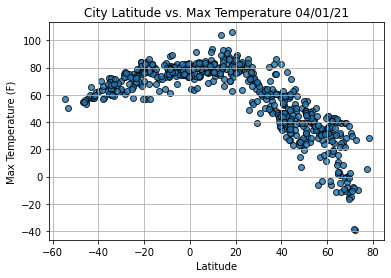

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

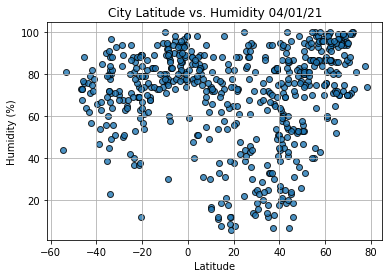

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

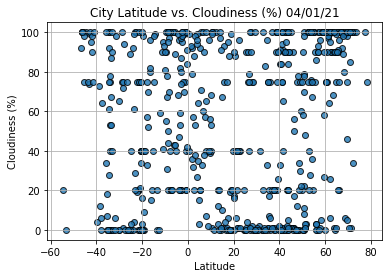

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

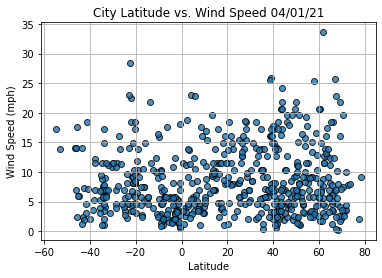

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = df.loc[(df["Lat"] >= 0)]
southern_hemi_df = df.loc[(df["Lat"] < 0)]

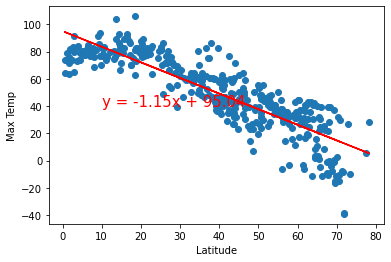

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


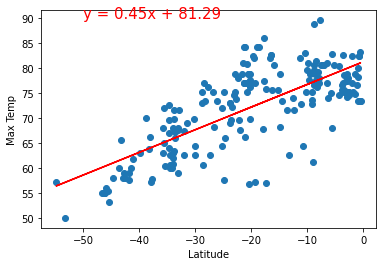

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

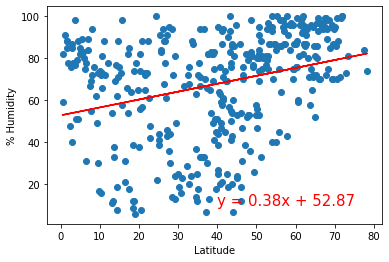

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

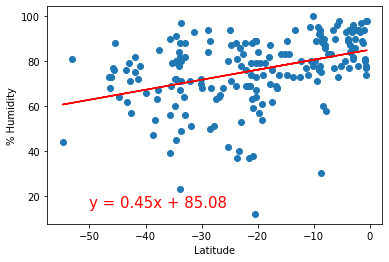

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

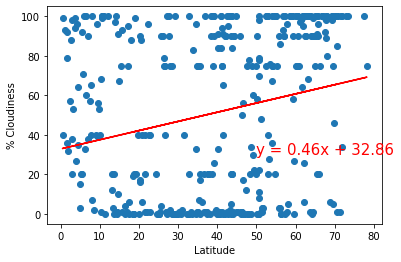

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,30))

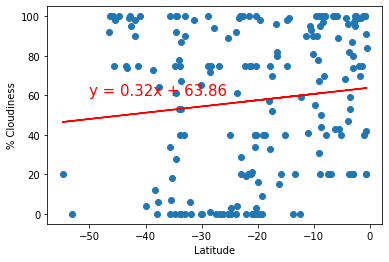

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

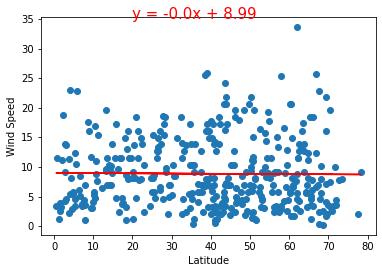

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,35))

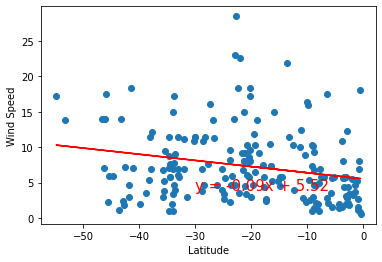

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,4))